### 1. Propose a numerically stable way to compute the function f(x, a) = √(x + a) −√x for positive x, a.

In [1]:
import numpy as np

def unstable_f(x, a):
    return np.sqrt(x + a) - np.sqrt(x)

The problem with this algorithm is that it is unsable when value of *a* is negligibly small compared to *x*. 
So we need to rewrite formula to get rid on substraction

In [2]:
unstable_f(1e10, 1e-10)

0.0

$$
\sqrt{x+a} - \sqrt{x} = \frac{ (\sqrt{x+a} - \sqrt{x}) *  (\sqrt{x+a}) + \sqrt{x})}{\sqrt{x+a} + \sqrt{x}} = \frac{a}{\sqrt{x+a} + \sqrt{x}}
$$

In [3]:
def stable_f(x, a):
    return a / (np.sqrt(x + a) + np.sqrt(x))

In [4]:
stable_f(1e10, 1e-10)

5e-16

### 2.

In [5]:
import mpmath
from mpmath import *
import sympy as sp
import numpy as np

In [6]:
mp.dsp = 256
mp.pretty = True

mpmath.tan(10**100)

0.401231961990814

Releative condition number: 
$$\kappa = \frac{\Vert J(x) \Vert}{\Vert f(x)\Vert / \Vert x \Vert} = \frac{ \frac{1}{cos^2(x)} }{ \frac{|tan(x)|}{|x|} } = \frac{|x|}{|cos(x) * sin(x)|}$$


In [7]:
x = mpf(10**100)
k = abs(x) / abs(cos(x) * sin(x))
print(f'Condition number is: {k}')

Condition number is: 2.84103067375392e+100


### 3. 

$$
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

In [22]:
import cmath
import math

def solve_quad(b, c):
    d = cmath.sqrt(math.pow(b, 2) - 4*1*c)
    r1 = (-b + d) / 2
    r2 = (-b - d) / 2
    return r1, r2

def check_result(b, c, r1, r2):
    res1 =  mpmath.power(r1, 2) + mpf(b)* r1 + mpf(c)
    res2 =  mpmath.power(r2, 2) + mpf(b)* r2 + mpf(c)
    return (res1, res2)

In [23]:
r1, r2 = solve_quad(-2, 1)
print(f'{r1}, {r2}')

(1+0j), (1+0j)


In [24]:
check_result(-2, 1, r1, r2)

((0.0 + 0.0j), (0.0 + 0.0j))

Run algorithm on given examples:

In [25]:
def run_tests(solver):
    i = 1
    for b, c in [(4.0, 3.0),
                 (2.0, 1.0),
                 (0.5, 4.0),
                 (1e10, 3.0),
                 (-1e10, 4.0)]:
        r1, r2 = solver(b, c)
        res1, res2 = check_result(b, c, r1, r2)
        print(f'{i}. root1: {r1}, root2: {r2}.\tCheck resut is close to zero: {res1}, {res2}\n')
        i += 1
        
run_tests(solve_quad)

1. root1: (-1+0j), root2: (-3+0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

2. root1: (-1+0j), root2: (-1+0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

3. root1: (-0.25+1.984313483298443j), root2: (-0.25-1.984313483298443j).	Check resut is close to zero: (-0.00000000000000037405146784588949026219789449128342920177590761633690252807582510286010801792144775390625 + 0.0j), (-0.00000000000000037405146784588949026219789449128342920177590761633690252807582510286010801792144775390625 + 0.0j)

4. root1: 0j, root2: (-10000000000+0j).	Check resut is close to zero: (3.0 + 0.0j), (3.0 + 0.0j)

5. root1: (10000000000+0j), root2: 0j.	Check resut is close to zero: (4.0 + 0.0j), (4.0 + 0.0j)



Lets use *mpmath* to increase precision and see the expected roots. 

In [26]:
mp.dps = 256
mp.pretty = True

def solve_quad_mp(b, c):
    d = mpmath.sqrt(mpmath.power(mpf(b), 2) - 4*mpf(c) + 0J)
    r1 = (-b + d) / 2
    r2 = (-b - d) / 2
    return r1, r2

In [27]:
run_tests(solve_quad_mp)

1. root1: (-1.0 + 0.0j), root2: (-3.0 + 0.0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

2. root1: (-1.0 + 0.0j), root2: (-1.0 + 0.0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

3. root1: (-0.25 + 1.984313483298442942876211815229445319282694387311837635276250844400801617422712720820294664855907707961298433753873097321807647416470411088320542916910080792037863047296242919224767196148815445525733540652792871017786955825256454337001183894197229459305776j), root2: (-0.25 - 1.984313483298442942876211815229445319282694387311837635276250844400801617422712720820294664855907707961298433753873097321807647416470411088320542916910080792037863047296242919224767196148815445525733540652792871017786955825256454337001183894197229459305776j).	Check resut is close to zero: (3.32999586548783578180997641566399936849931883440036517005052740274020552003129203637803030434975068150846777032648895698981581837168402022522378970265148407954781944668518391567604978021370587738839843

So, only one root of last two equations is far from correct.
Roots $\pm -10000000000$ are pretty close to correct ones, moreover they can not be represented better in numpy:

In [28]:
np.array(solve_quad_mp(1e10, 3.0)[1].real, dtype=np.float64)

array(-1.e+10)

The problem is that the number of $b^2$ is so big, that *c* is just neglected, and expression $(-b + \sqrt{b^2 - 4ac})$ or $(-b - \sqrt{b^2 - 4ac})$ becomes zero for positive or negatie $b$ respectively. 

Lets get rid of substitution:

$$
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{(-b \pm \sqrt{b^2 - 4ac})*(-b \mp \sqrt{b^2 - 4ac})) } {2a(-b \mp \sqrt{b^2 - 4ac})} = \frac{4ac}{2a(-b \mp \sqrt{b^2 - 4ac})} = \frac{2}{-b \mp \sqrt{b^2 - 4ac}}
$$

So,
1. if b >= 0, $x_1 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}$, $x_2 =  \frac{2}{- b - \sqrt{b^2 - 4ac}}$
1. if b < 0, $x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$, $x_2 =  \frac{2}{- b + \sqrt{b^2 - 4ac}}$

In [29]:
def solve_quad_stable(b, c):
    sign_b = 1 if (b < 0) else -1
    w = -b + sign_b * cmath.sqrt(math.pow(b, 2) - 4*c)
    r1 = w/2
    r2 = 2*c/w
    return r1, r2        

In [30]:
run_tests(solve_quad_stable)

1. root1: (-3+0j), root2: (-1-0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

2. root1: (-1+0j), root2: (-1-0j).	Check resut is close to zero: (0.0 + 0.0j), (0.0 + 0.0j)

3. root1: (-0.25-1.984313483298443j), root2: (-0.24999999999999994+1.9843134832984428j).	Check resut is close to zero: (-0.00000000000000037405146784588949026219789449128342920177590761633690252807582510286010801792144775390625 + 0.0j), (0.000000000000000507160739046941453718351789057895326271390324608169010434099988060552277602255344390869140625 + 0.00000000000000022030305172320772289881379905409088808764154847862071218145274542621336877346038818359375j)

4. root1: (-10000000000+0j), root2: (-3e-10-0j).	Check resut is close to zero: (3.0 + 0.0j), (0.00000000000000002004037876491734945996394421323773607899745735179063756358945089813241869018266924218414001678519815847719955093086952047087834216654300689697265625 + 0.0j)

5. root1: (10000000000+0j), root2: (4e-10+0j).	Check resut is close to zero: (4.0 +

Ok, so *root2* of 4th and 5th examples were calculated correctly.

### 4. 

For simplicity lets integer numbers as roots and calculated corresponding $a_{i}$ for them. 

In [60]:
import numpy.polynomial.polynomial as poly

N = 20
start = 1
roots = np.array([i for i in range(start, start + N)], dtype=np.float64)
a = poly.polyfromroots(roots)
print(a)

[ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]


In [61]:
# Lets check roots
roots = poly.polyroots(a)
print(roots)

[ 1.          2.          3.          3.99999997  5.00000075  5.99998904
  7.00010178  7.9993535   9.00295906  9.99022524 11.02528535 11.95398557
 13.06889885 13.92611834 15.05783223 15.96459171 17.01391126 17.99621355
 19.00056856 19.99996523]


As we see values are already not calculated correctly.

Lets perturb coefficents $a_{i}$ and see how much roots change.

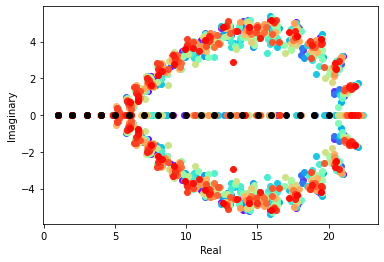

In [62]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 100))
roots_perturbed = []
for i in range(100):
    rand_values = np.random.normal(1, 1e-10, N + 1)
    a_perturb = a * rand_values
    
    roots_perturb = poly.polyroots(a_perturb)
    
    x = [ele.real for ele in roots_perturb] 
    y = [ele.imag for ele in roots_perturb] 
    
    plt.scatter(x, y, color=colors[i])
    roots_perturbed.append(roots_perturb)
 
roots_real = [ele.real for ele in roots] 
roots_img = [ele.imag for ele in roots] 

plt.scatter(roots_real, roots_img, color='black') 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.show()

Real roots are displayed in black, along x-axis.

As we see, root's values change significanly, especially near the beginning of last quater.

Lets find absolute and relative condition number of the problem of finding the roots of w(x) w.r.t polynomial coefficients. 

Lets define $k_{ij}$ as condition number of $root_{i}$ with respect to perturbations in coefficent $a_{j}$

1. Absolute number:
$$
k_{ij} = \frac{|\delta{root_{i}}|}{|\delta{a_{j}}|}
$$

2. Relative number:
$$
k_{ij} = \frac{ \frac{|\delta{root_{i}}|}{root_{i}} }{ \frac{|\delta{a_{j}}|}{a_{j}} }
$$

For that lets take some random experiment.

In [63]:
rand_values = np.random.normal(1, 1e-10, N + 1)
a_perturb = a * rand_values
roots_perturb = poly.polyroots(a_perturb)
    
k_values_abs = np.zeros(shape=(N, N+1))
k_values_relative = np.zeros(shape=(N, N+1))

for i in range(0, N):
    for j in range(0, N+1):
        delta_root = abs(roots_perturb[i] - roots[i])
        delta_a = abs(a[j] - a_perturb[j])
        
        k_values_abs[i][j] = delta_root / delta_a
        k_values_relative[i][j] = (delta_root / roots[i]) / (delta_a / a[j])

In [64]:
roots_perturb

array([ 1.        +0.j        ,  1.99999669+0.j        ,
        3.00005691+0.j        ,  4.0025052 +0.j        ,
        4.94568672+0.j        ,  6.30497802-0.54082208j,
        6.30497802+0.54082208j,  7.11052739+0.j        ,
        8.19493498-2.15681077j,  8.19493498+2.15681077j,
       10.52446493-3.49519453j, 10.52446493+3.49519453j,
       13.64797241-4.33981825j, 13.64797241+4.33981825j,
       14.03350576+0.j        , 17.24112353-4.17841326j,
       17.24112353+4.17841326j, 20.2840193 -2.56389564j,
       20.2840193 +2.56389564j, 21.51273501+0.j        ])

In [65]:
# Lets find maximum condition number.

ind_rel_i, ind_rel_j = np.unravel_index(np.argmax(k_values_relative, axis=None), k_values_relative.shape)
ind_abs_i, ind_abs_j = np.unravel_index(np.argmax(k_values_abs, axis=None), k_values_abs.shape)

print(f"Max abs condition number is:\t{k_values_abs[ind_abs_i][ind_abs_j]} for root_{ind_abs_i+1} and a_{ind_abs_j+1}")
print(f"Max rel condition number is:\t{k_values_abs[ind_rel_i][ind_rel_j]} for root_{ind_rel_i+1} and a_{ind_rel_j+1}")

Max abs condition number is:	28840827572.066483 for root_13 and a_21
Max rel condition number is:	8992.241635699484 for root_13 and a_17


Lets calculate single conditional value using 2-norm:

1. Absole number:
$$
k = \frac{||\delta{root}||_2}{||\delta{a}||_2}
$$


2. Relative number:
$$
k = \frac{ \frac{||\delta{root}||_2}{||root||_2} }{ \frac{||\delta{a}||_2}{||a||_2} }
$$



In [66]:
delta_root = roots - roots_perturb
delta_a = a - a_perturb

k_abs = np.linalg.norm(delta_root) / np.linalg.norm(delta_a)
k_rel = (np.linalg.norm(delta_root) / np.linalg.norm(roots)) / (np.linalg.norm(delta_a) / np.linalg.norm(a))
print(f"Abs condition number: {k_abs}")
print(f"Relative condition number: {k_rel}")

Abs condition number: 4.2907632855298715e-09
Relative condition number: 1822637192.1760206


### 6.

In [69]:
import sympy as sp
import numpy as np

eps = sp.Symbol('\\epsilon')
eps

\epsilon

In [70]:
A = sp.Matrix([ [ 1, 1 ], [ 1, 1 + eps ], [ 1, 1 + eps ] ])
A

Matrix([
[1,            1],
[1, \epsilon + 1],
[1, \epsilon + 1]])

In [71]:
b = sp.Matrix([ [ 2 ], [ eps ], [ 4 + eps ] ])
b

Matrix([
[           2],
[    \epsilon],
[\epsilon + 4]])

In [72]:
x = (A.T @ A).inv() @ A.T @ b
x

Matrix([
[\epsilon*(1 + 2/\epsilon + (-2*\epsilon - 3)*(\epsilon + 1)/(2*\epsilon**2) + 3/(2*\epsilon**2)) + (\epsilon + 4)*(1 + 2/\epsilon + (-2*\epsilon - 3)*(\epsilon + 1)/(2*\epsilon**2) + 3/(2*\epsilon**2)) + 2 + 4/\epsilon + (-2*\epsilon - 3)/\epsilon**2 + 3/\epsilon**2],
[                                                   \epsilon*((-2*\epsilon - 3)/(2*\epsilon**2) + 3*(\epsilon + 1)/(2*\epsilon**2)) + (\epsilon + 4)*((-2*\epsilon - 3)/(2*\epsilon**2) + 3*(\epsilon + 1)/(2*\epsilon**2)) + (-2*\epsilon - 3)/\epsilon**2 + 3/\epsilon**2]])

In [73]:
x = sp.simplify(x)
x

Matrix([
[1],
[1]])

Solve in single and double precision.

In [74]:
def solve(dtype):
    A = np.array([[1, 1], [1, 1.00001], [1, 1.00001]], dtype=dtype)
    b = np.array([[2], [0.00001], [4.00001]], dtype=dtype)
    x = np.linalg.inv(A.T @ A) @ A.T @ b
    return x

In [75]:
solve(np.float32)

array([[1612.1589],
       [1461.854 ]], dtype=float32)

In [76]:
solve(np.float64)

array([[1.000005  ],
       [0.99999857]])

Result of single precision solution is far from correct, mistake is huge.

Result of double precision solution is close to real one.

Lets solve with SVD

In [77]:
A = np.array([[1, 1], [1, 1.00001], [1, 1.00001]], dtype=np.float64)
b = np.array([[2], [0.00001], [4.00001]], dtype=np.float64)
    
U, S, VT = np.linalg.svd(A)
S_diag_inv = np.diag(1/S)
b_bar = U.T @ b

x_bar = S_diag_inv @ b_bar[:2]
x = VT.T @ x_bar

In [78]:
x

array([[1.],
       [1.]])

Answer is precise, it's more numerically stable than solution using inverse.

In [79]:
np.linalg.lstsq(A, b)

/var/folders/gl/1wq3nc9n0zz0yllzyg_px9vm0000gn/T/ipykernel_14964/4073112971.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, b)


(array([[1.],
        [1.]]),
 array([8.]),
 2,
 array([2.44949791e+00, 5.77348345e-06]))

np.linalg.lstsq solution is also correct, since it uses svd.

Lets find 4 conditional numbers.

1. Sensitivity of y to perturbations of b

$$
k_{yb} = \frac{1}{cos \theta}
$$

2. Sensitivity of y to perturbations of A

$$
k_{yA} = \frac{k(A)}{cos \theta}
$$

3. Sensitivity of x to perturbations of b

$$
k_{xb} = \frac{k(A)}{n cos \theta}
$$

4. Sensitivity of x to perturbations of A

$$
k_{xA} = k(A) + \frac{k(A)^2 tan\theta}{n}
$$

Where:

$$
 n = \frac{\Vert A \Vert\Vert x \Vert}{\Vert A x \Vert}
$$

$$
 k(A) = \frac{\sigma_{max}}{\sigma_{min}}
$$

$$
 cos\theta = \frac{||y||}{||b||}
$$

$$
 tan\theta = \frac{||b - y||}{||y||}
$$

In [80]:
y = A @x
y

array([[2.     ],
       [2.00001],
       [2.00001]])

In [81]:
_, S, _ = np.linalg.svd(A)
S

array([2.44949791e+00, 5.77348345e-06])

In [82]:
# Calculate intermidiate values

k_a = S[0] / S[1]
print(f'k_a: {k_a}')

n = np.linalg.norm(A) * np.linalg.norm(x) / np.linalg.norm(A @ x) 
print(f'n: {n}')

cos_theta = np.linalg.norm(y) / np.linalg.norm(b)
print(f'cos_theta: {cos_theta}')

tan_theta = np.linalg.norm(b - y) / np.linalg.norm(b)
print(f'tan_theta: {tan_theta}')

k_a: 424266.8971462293
n: 1.0000000000083336
cos_theta: 0.7745977020348049
tan_theta: 0.6324542671232443


In [83]:
k_yb = 1 / cos_theta
k_yA = k_a / cos_theta
k_xb = k_a / (n * cos_theta)
k_xA = k_a + (np.power(k_a, 2)*tan_theta) / n

In [84]:
print(f'k_yb: {k_yb}\nk_yA: {k_yA}\nk_xb: {k_xb}\nk_xA: {k_xA}')

k_yb: 1.290992727415898
k_yA: 547725.4786990909
k_xb: 547725.4786945264
k_xA: 113843710247.28421
